<a href="https://colab.research.google.com/github/jeonghojo00/HousingPricePrediction/blob/main/HousingPrice_Prophet_byZip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import json
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.serialize import model_to_json, model_from_json

## Step 0. Connect to Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1. Define Functions

### Load Data

In [19]:
def load_data():
    colab_notebook = "/content/drive/My Drive/Colab Notebooks/"
    zillow_dataset = "Zillow/AllHomesZipPrices.csv"
    df = pd.read_csv(colab_notebook+zillow_dataset)
    return df

### Get City Dataframe

In [20]:
def get_city_df(df, state, city):
    state_df = df[df['state'] == state]
    city_df = state_df[state_df['city'] == city]

    return city_df

### Get House Price Prediction

In [81]:
def get_HousingPricePrediction(city_df, zip, period = 24):
    zip_df = city_df[city_df['zip']==zip].loc[:,('ds', 'y')]
    md = Prophet(interval_width=0.95, weekly_seasonality=True, daily_seasonality=True)
    model = md.fit(zip_df)
    future = model.make_future_dataframe(periods=period, freq='M') #freq changes frequency of dates. Default Daily
    pred_y = model.predict(future)

    return md, pred_y

### Save Model

In [68]:
def save_prophet_model(model, filename):
  colab_notebook = "/content/drive/My Drive/Colab Notebooks/models/"
  with open(colab_notebook + filename, 'w') as fout:
    json.dump(model_to_json(model), fout)

### Load Model

In [69]:
def load_prophet_model(filename):
  colab_notebook = "/content/drive/My Drive/Colab Notebooks/models/"
  with open(colab_notebook+filename, 'r') as fin:
    model = model_from_json(json.load(fin)) 
    return model

## Step 2. Run Codes for One Zip Code Area

### Load Dataset

In [57]:
df = load_data()

### Get City Dataframe

In [58]:
state = 'TX'
city = 'Houston'
city_df = get_city_df(df, state, city)
zipCodes = city_df['zip'].unique()

print(zipCodes)

[77084 77036 77077 77095 77082 77007 77057 77083 77070 77042 77063 77081
 77008 77072 77089 77015 77040 77339 77024 77088 77099 77090 77055 77044
 77004 77064 77080 77060 77006 77009 77065 77079 77035 77096 77054 77056
 77092 77074 77025 77073 77093 77034 77019 77075 77598 77018 77027 77041
 77014 77049 77021 77087 77047 77091 77017 77066 77005 77043 77022 77071
 77023 77016 77067 77045 77098 77058 77062 77076 77345 77033 77061 77053
 77020 77038 77069 77086 77026 77039 77048 77051 77002 77030 77011 77012
 77059 77028 77013 77031 77029 77003 77336 77085 77037 77078 77068 77094
 77032 77050 77046 77010]


### Select one of zip codes

In [79]:
zip = 77084

### Get House Price Prediction

In [82]:
# Train and predict using Prophet model
md, pred_y = get_HousingPricePrediction(city_df, zip, period = 24)

# Plot
plot_plotly(md, pred_y)

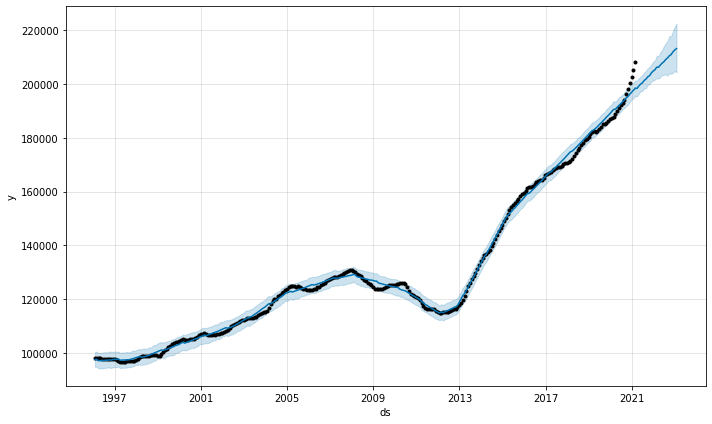

In [61]:
fig1 = md.plot(pred_y)

### Save Model

In [78]:
filename = city+state+str(zip)+'.json'
print(filename)

HoustonTX77010.json


In [72]:
save_prophet_model(md, filename)

### Re-load the model saved to check

In [73]:
loaded_model = load_prophet_model(filename)

In [74]:
period = 24
future = loaded_model.make_future_dataframe(periods=period, freq='MS') #freq changes frequency of dates. Default Daily
pred_y = loaded_model.predict(future)

In [75]:
plot_plotly(loaded_model, pred_y)

## Step 3. Run Codes For a City

### Load Dataset

In [99]:
df = load_data()
zip_dict = dict()

### Get Housing Price prophet models and Save as json file

#### Houston, TX

In [100]:
##### Get Dataset for Cities to run simulations
state = 'TX'
city = 'Houston'
city_df = get_city_df(df, state, city)

zips = city_df['zip'].unique()
zip_dict[city+state] = zips

print('Number of Zip Code Areas in '+city+', '+state+': ', len(zips))

Number of Zip Code Areas in Houston, TX:  100


In [92]:
##### Make Prophet models and Save as json files
period = 24 ## in month
for zip in zips:
  # Train and predict using Prophet model
  md, pred_y = get_HousingPricePrediction(city_df, zip, period = period)
  filename = city+state+str(zip)+'.json'
  save_prophet_model(md, filename)
print("Completed to save "+str(len(zips))+" zip code areas in "+ city + ', '+ state)

Completed to save 100 zip code areas in Houston, TX


#### Dallas, TX

In [101]:
##### Get Dataset for Cities to run simulations
state = 'TX'
city = 'Dallas'
city_df = get_city_df(df, state, city)

zips = city_df['zip'].unique()
zip_dict[city+state] = zips

print('Number of Zip Code Areas in '+city+', '+state+': ', len(zips))

Number of Zip Code Areas in Dallas, TX:  45


In [94]:
##### Make Prophet models and Save as json files
period = 24 ## in month
for zip in zips:
  # Train and predict using Prophet model
  md, pred_y = get_HousingPricePrediction(city_df, zip, period = period)
  filename = city+state+str(zip)+'.json'
  save_prophet_model(md, filename)
  
print("Completed to save "+str(len(zips))+" zip code areas in "+ city + ', '+ state)

Completed to save 45 zip code areas in Dallas, TX


#### Boston, MA

In [102]:
state = 'MA'
city = 'Boston'
city_df = get_city_df(df, state, city)

zips = city_df['zip'].unique()
zip_dict[city+state] = zips

print('Number of Zip Code Areas in '+city+', '+state+': ', len(zips))

Number of Zip Code Areas in Boston, MA:  28


In [96]:
##### Make Prophet models and Save as json files
period = 24 ## in month
for zip in zips:
  # Train and predict using Prophet model
  md, pred_y = get_HousingPricePrediction(city_df, zip, period = period)
  filename = city+state+str(zip)+'.json'
  save_prophet_model(md, filename)
  
print("Completed to save "+str(len(zips))+" zip code areas in "+ city + ', '+ state)

Completed to save 28 zip code areas in Boston, MA


### Re-Load Prophet models and predict with with chosen period

In [103]:
zip_dict

{'BostonMA': array([2135, 2124, 2127, 2130, 2128, 2118, 2136, 2125, 2116, 2131, 2119,
        2132, 2115, 2215, 2134, 2121, 2122, 2126, 2114, 2129, 2120, 2111,
        2113, 2210, 2109, 2108, 2110, 2199]),
 'DallasTX': array([75287, 75243, 75228, 75206, 75217, 75211, 75204, 75219, 75231,
        75227, 75248, 75216, 75214, 75220, 75230, 75252, 75238, 75254,
        75229, 75208, 75201, 75218, 75224, 75240, 75241, 75232, 75225,
        75235, 75237, 75212, 75215, 75209, 75253, 75236, 75203, 75244,
        75249, 75233, 75223, 75210, 75226, 75202, 75207, 75246, 75247]),
 'HoustonTX': array([77084, 77036, 77077, 77095, 77082, 77007, 77057, 77083, 77070,
        77042, 77063, 77081, 77008, 77072, 77089, 77015, 77040, 77339,
        77024, 77088, 77099, 77090, 77055, 77044, 77004, 77064, 77080,
        77060, 77006, 77009, 77065, 77079, 77035, 77096, 77054, 77056,
        77092, 77074, 77025, 77073, 77093, 77034, 77019, 77075, 77598,
        77018, 77027, 77041, 77014, 77049, 77021, 77087, 

In [104]:
city = 'Boston'
state = 'MA'
print(zip_dict[city+state])

[2135 2124 2127 2130 2128 2118 2136 2125 2116 2131 2119 2132 2115 2215
 2134 2121 2122 2126 2114 2129 2120 2111 2113 2210 2109 2108 2110 2199]


In [105]:
zip = '2135'
filename = city+state+str(zip)+'.json'
print(filename)

BostonMA2135.json


In [107]:
loaded_md = load_prophet_model(filename)
period = 60

future = loaded_md.make_future_dataframe(periods=period, freq='M') #freq changes frequency of dates. Default Daily
pred_y = loaded_md.predict(future)

plot_plotly(loaded_md, pred_y)

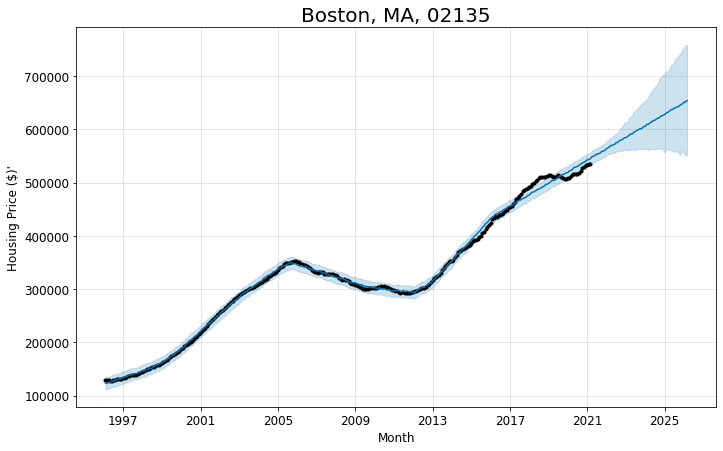

In [112]:
fig = loaded_md.plot(pred_y, xlabel='Month', ylabel='Housing Price ($)')
ax = fig.gca()
ax.set_title(city+', '+state+', 0'+zip, size=20)
ax.set_xlabel("Month", size=12)
ax.set_ylabel("Housing Price ($)'", size=12)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)